# Machine learning tutorial: Part 1

### **CREDIT My greatest colleague: Joe Meli**

This purpose of this tutorial is to give an idea how we can build a model to identify "bad" plots in different products, in other words, a _supervised_ machine learning task to find out

_For the sake of simplicity in this tutorial, we say an image is "bad" because it is likely "blank"_

We will take a few steps towards building "simpler" and "simpler" models.

### This tutorial IS about:

1. A basic practice to build a machine learning project
2. How to train models
3. AutoML

### This tutorial IS NOT about:

1. Theory and math
2. Python tutorial
3. Tune hyperparameter


In [1]:
# Set some environmental variables
import os
import sys
import json
import matplotlib.pyplot as plt
import numpy; np = numpy
import datetime

np.random.seed(1)

try:
    import util
except ImportError:
    # Modify this according to your local env
    _src_root = Path.home() / "imageqc-master"
    sys.path.append(str(_src_root))
    import util

Because we need load training/dev/test datasets every time, we made some helpers to simplify these.

These are defined in `util.py`

### Use a helper function to load data into global environment. 
### Notes

`matplotlib.pyplot.imread` function has a native method to read `.png` file. It reads pixels as 0-1 float numbers, not 0-255. It is very convenient, otherwise we would need normalize value. Luckily our data are all png files




In [2]:
# Initialize global variables
util.inject_config()
print(f"Project directory is {HOME_DIR}") 
print(f"Training set is in {TRAIN_DIR}") 
print(f"Validation(dev) set is in {VALIDATION_DIR}")
print(f"Evaluation(test) set is in {TEST_DIR}") 
print(f"Input image format is {EXTENSION}")

Project directory is /Users/jytang/imageqc-master
Training set is in /Users/jytang/imageqc-master/train_images
Validation(dev) set is in /Users/jytang/imageqc-master/validation_images
Evaluation(test) set is in /Users/jytang/imageqc-master/test_images
Input image format is .png


### Load training set with their labels

Reuse cached array train_cache.npz


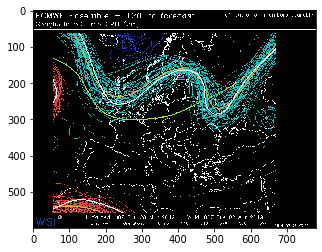

In [3]:
x_train, y_train = util.read_image("train", EXTENSION, onehot=False)
plt.imshow(x_train[0, :, :, :])

### The label is simply 0 (good) and 1 (bad) for each image

In [4]:
import pandas as pd
pd.read_csv("test_labels.csv", header=None, names=["bad"])

,bad
0,0
1,0
2,0
3,0
4,0
...,...
165,0
166,0
167,0
168,0


### Load test set (evaluation images) and labels

In [5]:
x_test, y_test = util.read_image("test", EXTENSION, onehot=False)

Reuse cached array test_cache.npz


### Let us start with the simplest idea, logistic regression. Our idea is very simple, 

\begin{equation}
l(\vec{z}(z_1, z_2, \cdots, z_{n})) = \frac{1}{1+e^{-\vec{z}}}
\end{equation}

We also call it as softmax regression


In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
x_validation, y_validation = util.read_image("validation", onehot=False)

Reuse cached array validation_cache.npz


In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=10, copy=True)
x_validation_pca = numpy.reshape(x_validation, (x_validation.shape[0], -1))
pca.fit(x_validation_pca)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
print(pca.explained_variance_ratio_)

[0.33927932 0.08207551 0.03509    0.03322235 0.02435511 0.02256664
 0.0211048  0.01563743 0.01447871 0.01384463]


In [11]:
x_train_logistric = x_train.reshape((740, -1))
print(x_train_logistric.shape)
# Let us random pick 100 pixels from it to build a model
a = np.random.random_integers(0, 1404000, 100)
x_train_logistric_sample = x_train_logistric[:, a]

(740, 1404000)


/opt/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 1404000 + 1) instead
  after removing the cwd from sys.path.


In [12]:
x_train_logistri_pca = pca.transform(x_train_logistric)
x_train_logistri_pca.shape

(740, 10)

### Now let us build logistic regression model

In [13]:
clf = LogisticRegression(verbose=True)

In [14]:
clf.fit(x_train_logistri_pca, y_train)

[LibLinear]

/opt/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=True,
                   warm_start=False)

In [15]:
result = clf.predict(pca.transform(x_test.reshape((x_test.shape[0], -1)))) 
print(result)
print(f"Score = {(result == y_test).sum() / len(result) * 100:.2f}%")
del clf

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Score = 88.82%


### No really good, In fact, it is worse than a random pickup

In [16]:
clf = LogisticRegression(verbose=True)

In [17]:
clf.fit(x_train_logistric_sample, y_train)

[LibLinear]

/opt/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=True,
                   warm_start=False)

In [18]:
result = clf.predict(x_test.reshape((x_test.shape[0], -1))[:, a]) 
print(result)
print(f"Score = {(result == y_test).sum() / len(result) * 100:.2f}%")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 0.]
Score = 90.00%


Of course we can do better, for this `simple` case, we can reach 100% correctness in many ways.

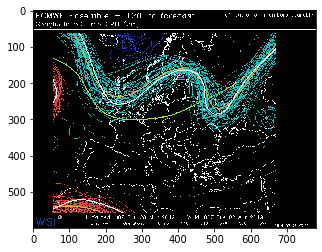

In [19]:
plt.imshow(x_train[0, :, :, :])

### We can think about how to create some proper "structured features"
For example, color (RGB) distribution

In [20]:
def feature_array_from_band(band, output=False):
    avg = numpy.mean(band)
    if output: 
        print(f"mean color value={avg}")
    hist = numpy.histogram(numpy.ravel(band))[0] / band.shape[0] / band.shape[1]
    if output:
        print(f"histgram of pixels are {hist}")
    return [avg] + list(hist)

mean color value=0.06686550378799438
histgram of pixels are [0.92733547 0.00242521 0.         0.         0.         0.
 0.00836325 0.         0.         0.06187607]
mean color value=0.1038186252117157
histgram of pixels are [8.68408120e-01 0.00000000e+00 1.52820513e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.01175214e-02 5.81025641e-02
 6.41025641e-05 4.80256410e-02]
mean color value=0.10100289434194565
histgram of pixels are [0.86834402 0.00846368 0.01196795 0.         0.         0.00088889
 0.00500855 0.05816667 0.         0.04716026]


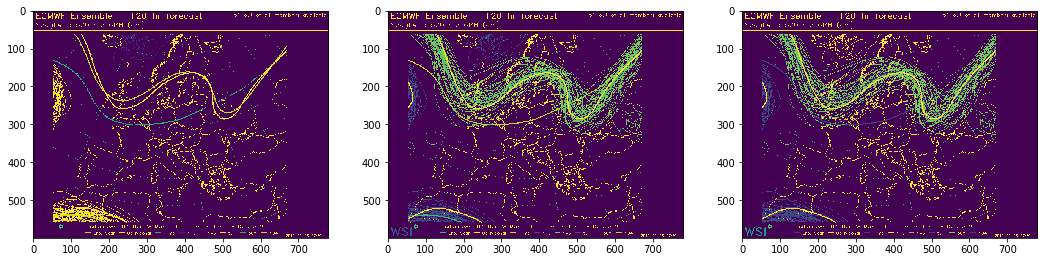

In [21]:
plt.figure(figsize=(18,20))
img_features = []
for i in range(3):
    image0 = x_train[0, :, :, i]
    plt.subplot(int(f"13{i + 1}"))
    plt.imshow(image0)
    img_features += feature_array_from_band(image0, output=True)

In [22]:
def dataset_to_feature_array(dataset):
    p = numpy.zeros((dataset.shape[0], 33))
    for i in range(dataset.shape[0]):
        for b in range(3):
            p[i, b * 11:(b + 1) * 11] = numpy.array(feature_array_from_band(dataset[i, :, :, b]))
    return p

In [23]:
# Load test images and labels
x_train_nn = dataset_to_feature_array(x_train)
x_validation_nn = dataset_to_feature_array(x_validation)
x_test_nn = dataset_to_feature_array(x_test)
print('x_test shape:', x_test.shape)

x_test shape: (170, 600, 780, 3)


In [24]:
from sklearn.neural_network import MLPClassifier

In [25]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10,), random_state=1, activation='relu', batch_size=32, verbose=True, max_iter=1000)

In [26]:
clf.fit(x_train_nn, y_train)

Iteration 1, loss = 0.96136452
Iteration 2, loss = 0.81940994
Iteration 3, loss = 0.68956951
Iteration 4, loss = 0.58117914
Iteration 5, loss = 0.49522434
Iteration 6, loss = 0.42628582
Iteration 7, loss = 0.37267596
Iteration 8, loss = 0.32994017
Iteration 9, loss = 0.29739418
Iteration 10, loss = 0.27258164
Iteration 11, loss = 0.25389627
Iteration 12, loss = 0.23951630
Iteration 13, loss = 0.22807617
Iteration 14, loss = 0.21937839
Iteration 15, loss = 0.21225535
Iteration 16, loss = 0.20692179
Iteration 17, loss = 0.20233450
Iteration 18, loss = 0.19876160
Iteration 19, loss = 0.19562221
Iteration 20, loss = 0.19286632
Iteration 21, loss = 0.19043752
Iteration 22, loss = 0.18801162
Iteration 23, loss = 0.18589075
Iteration 24, loss = 0.18387840
Iteration 25, loss = 0.18190272
Iteration 26, loss = 0.18009994
Iteration 27, loss = 0.17833362
Iteration 28, loss = 0.17663980
Iteration 29, loss = 0.17499923
Iteration 30, loss = 0.17338813
Iteration 31, loss = 0.17179637
Iteration 32, los

Iteration 253, loss = 0.08397180
Iteration 254, loss = 0.08372732
Iteration 255, loss = 0.08365261
Iteration 256, loss = 0.08335287
Iteration 257, loss = 0.08330180
Iteration 258, loss = 0.08328884
Iteration 259, loss = 0.08317112
Iteration 260, loss = 0.08279955
Iteration 261, loss = 0.08273583
Iteration 262, loss = 0.08244004
Iteration 263, loss = 0.08238359
Iteration 264, loss = 0.08226854
Iteration 265, loss = 0.08177571
Iteration 266, loss = 0.08180127
Iteration 267, loss = 0.08192064
Iteration 268, loss = 0.08160920
Iteration 269, loss = 0.08136254
Iteration 270, loss = 0.08126292
Iteration 271, loss = 0.08170953
Iteration 272, loss = 0.08096726
Iteration 273, loss = 0.08076502
Iteration 274, loss = 0.08052134
Iteration 275, loss = 0.08029941
Iteration 276, loss = 0.08027891
Iteration 277, loss = 0.08005568
Iteration 278, loss = 0.07984471
Iteration 279, loss = 0.08000910
Iteration 280, loss = 0.07935796
Iteration 281, loss = 0.07926305
Iteration 282, loss = 0.07932352
Iteration 

Iteration 514, loss = 0.05174048
Iteration 515, loss = 0.05170382
Iteration 516, loss = 0.05162593
Iteration 517, loss = 0.05140589
Iteration 518, loss = 0.05157415
Iteration 519, loss = 0.05110164
Iteration 520, loss = 0.05113055
Iteration 521, loss = 0.05132482
Iteration 522, loss = 0.05115520
Iteration 523, loss = 0.05075906
Iteration 524, loss = 0.05091803
Iteration 525, loss = 0.05117736
Iteration 526, loss = 0.05067466
Iteration 527, loss = 0.05061943
Iteration 528, loss = 0.05043971
Iteration 529, loss = 0.05104065
Iteration 530, loss = 0.05154655
Iteration 531, loss = 0.05072101
Iteration 532, loss = 0.05022229
Iteration 533, loss = 0.05010862
Iteration 534, loss = 0.05029126
Iteration 535, loss = 0.05018032
Iteration 536, loss = 0.04985944
Iteration 537, loss = 0.04987702
Iteration 538, loss = 0.04997935
Iteration 539, loss = 0.04990716
Iteration 540, loss = 0.04960507
Iteration 541, loss = 0.04995284
Iteration 542, loss = 0.04965483
Iteration 543, loss = 0.04953643
Iteration 

Iteration 768, loss = 0.03736925
Iteration 769, loss = 0.03779965
Iteration 770, loss = 0.03748793
Iteration 771, loss = 0.03724614
Iteration 772, loss = 0.03770356
Iteration 773, loss = 0.03811854
Iteration 774, loss = 0.03714962
Iteration 775, loss = 0.03711215
Iteration 776, loss = 0.03725584
Iteration 777, loss = 0.03697163
Iteration 778, loss = 0.03688586
Iteration 779, loss = 0.03703011
Iteration 780, loss = 0.03698682
Iteration 781, loss = 0.03684972
Iteration 782, loss = 0.03684475
Iteration 783, loss = 0.03661561
Iteration 784, loss = 0.03678237
Iteration 785, loss = 0.03676687
Iteration 786, loss = 0.03657977
Iteration 787, loss = 0.03655164
Iteration 788, loss = 0.03645449
Iteration 789, loss = 0.03687668
Iteration 790, loss = 0.03629573
Iteration 791, loss = 0.03631722
Iteration 792, loss = 0.03652075
Iteration 793, loss = 0.03646171
Iteration 794, loss = 0.03643435
Iteration 795, loss = 0.03674211
Iteration 796, loss = 0.03687515
Iteration 797, loss = 0.03597059
Iteration 

MLPClassifier(activation='relu', alpha=1e-05, batch_size=32, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [28]:
result = clf.predict(x_test_nn) 
print(result)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [29]:
print(f"Score = {(result == y_test).sum() / len(result) * 100:.2f}%")

Score = 98.82%


In [30]:
# Let us see what was incorrctly predicted
numpy.argwhere(result != y_test)

array([[117],
       [146]])

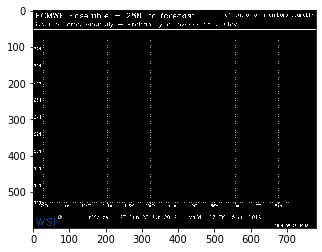

In [31]:
plt.imshow(x_test[146])